# Purpose
This notebook details how batches are randomly masked.

# Import

In [1]:
import pandas as pd
import torch
import torchvision

In [2]:
# load the dataset
train_dataset_dir = '../data/train/'
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_dir, transform=torchvision.transforms.ToTensor())
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=False)

# first batch
batch = next(iter(train_dataloader))[0]

# Masking process

In [3]:
# apply the mask
from glcic.utils import *

lm,em = generate_mask(4)
replacement_val = torch.rand(3)
masked_batch = apply_mask(batch,em,replacement_val)

Text(0.5, 1.0, 'Local masked')

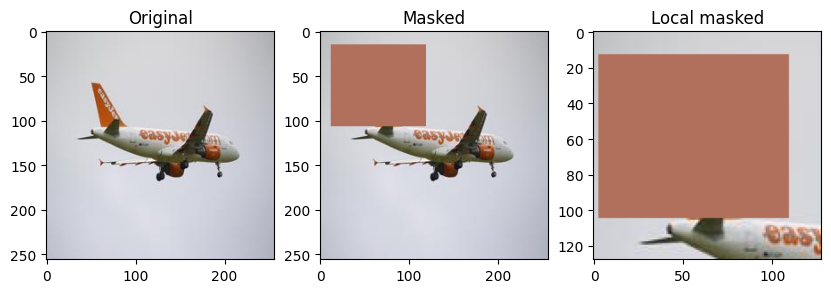

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 15))

# display the original image
axes[0].imshow(batch[0].permute(1,2,0))
axes[0].set_title('Original')

# display the masked image
axes[1].imshow(masked_batch[0].permute(1,2,0))
axes[1].set_title('Masked')

# display the local masked image
h,h2,w,w2 = lm[0]
axes[2].imshow(masked_batch[0][:,h:h2,w:w2].permute(1,2,0))
axes[2].set_title('Local masked')

# MSE loss

In [5]:
mse_loss = compute_mse_loss(masked_batch, batch, em)
print("The MSE loss is: ", mse_loss)

The MSE loss is:  tensor(3277.5444)
